In [85]:
#Импорт библиотек
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import string, re
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
#Загрузка стоп-слов
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
def preprocess_text(text):
    # Приведение текста к нижнему регистру
    text = text.lower()
    # Удаление всех символов, кроме букв
    text = re.sub(r'[^а-яА-ЯёЁ]', ' ', text)
    tokens = text.split()
    # Удаление стоп-слов
    tokens = [word for word in tokens if word not in russian_stopwords]
    return ' '.join(tokens)

#Монеточка - "Селфхарм"

In [3]:
selfharm = '''Я пахну как селфхарм, пахну как очень плохой план
Пахну детской травмой и истериками до утра
Неловкой паузой, комнатой непроветренной
Пахну недоверием к психотерапевтам, и
Мой запах — это стопроцентный кортизол
Я прячу чувства за клоунской маской, лол
Я пахну ревностью и ненавистью, но
Не бойся, накажу сама себя потом
Я пахну как восемь часов листать ТикТок
Пахну как ток, как «не подходи — убьёт»
Как крокодил, как медленная тётя впереди
Когда тропинка узкая, и её не обойти
Я пахну как боязнь смотреть тебе в глаза
Как много лет искать слова, но так и не сказать
Пахну оголённым проводом, паникой без повода
Депрессивным городом

А ты пахнешь как спокойствие, как в голове тишина
Ты — как десять часов непрерывного сна
Ты — четверг, ты — 16:00, ты — ромашковый чай и покой
Вечно плачу, а ты пахнешь как эти шампуни без слёз
Как забота, как дом, как способность всерьёз
И надолго любить, бесконечно любить
А ты пахнешь как спокойствие, как в голове тишина
Ты — как десять часов непрерывного сна
Ты — четверг, ты — 16:00, ты — ромашковый чай и покой
Вечно плачу, а ты пахнешь как эти шампуни без слёз
Как забота, как дом, как способность всерьёз
И надолго любить, бесконечно любить

Я пахну как отстой, но я умоляю тебя, постой
Многого не попрошу, у меня запрос простой:
Пожалуйста, позволь залечь на тебя пластом
Как будто ты песок, а я скат или сом
Угомониться бы в твоих безмятежных руках
Но я пахну как страх, как сбежать впопыхах
Как среди ночи будить, в слезах поговорить
Как ногти грызть или губы кусать до крови
Как тигр в клетке, нервно нарезающий круги
Как приукрашивать, чтобы понравиться другим
Как расцарапанный экран, пропущенный звонок
Как недолеченный невроз, протёкший потолок
Я пахну как боязнь смотреть тебе в глаза
Как много лет искать слова, но так и не сказать
И в этом смысле тебя очень пронесло
А то сам понимаешь, было бы ни то ни сё

Ведь ты пахнешь как спокойствие, как в голове тишина
Ты — как десять часов непрерывного сна
Ты — четверг, ты — 16:00, ты — ромашковый чай и покой
Вечно плачу, а ты пахнешь как эти шампуни без слёз
Как забота, как дом, как способность всерьёз
И надолго любить, бесконечно любить
А ты пахнешь как спокойствие, как в голове тишина
Ты — как десять часов непрерывного сна
Ты — четверг, ты — 16:00, ты — ромашковый чай и покой
Вечно плачу, а ты пахнешь как эти шампуни без слёз
Как забота, как дом, как способность всерьёз
И надолго любить, бесконечно любить'''

##Подсчет TF-IDF

In [77]:
selfharm_preprocessed = preprocess_text(selfharm)

In [78]:
selfharm_preprocessed

'пахну селфхарм пахну очень плохой план пахну детской травмой истериками утра неловкой паузой комнатой непроветренной пахну недоверием психотерапевтам запах это стопроцентный кортизол прячу чувства клоунской маской лол пахну ревностью ненавистью бойся накажу сама пахну восемь часов листать тикток пахну ток подходи убьёт крокодил медленная тётя впереди тропинка узкая её обойти пахну боязнь смотреть тебе глаза лет искать слова сказать пахну оголённым проводом паникой повода депрессивным городом пахнешь спокойствие голове тишина десять часов непрерывного сна четверг ромашковый чай покой вечно плачу пахнешь шампуни слёз забота дом способность всерьёз надолго любить бесконечно любить пахнешь спокойствие голове тишина десять часов непрерывного сна четверг ромашковый чай покой вечно плачу пахнешь шампуни слёз забота дом способность всерьёз надолго любить бесконечно любить пахну отстой умоляю постой многого попрошу запрос простой пожалуйста позволь залечь пластом песок скат сом угомониться тво

In [56]:
# Зафиттим наши данные в TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit([selfharm_preprocessed])

# Векторизуем через tf-idf
tfidf_matrix = tfidf.transform([selfharm_preprocessed])
tfidf_matrix_dense = tfidf_matrix.todense()

# Получение названий признаков (слов)
feature_names = tfidf.get_feature_names_out()

selfharm_df = pd.DataFrame(tfidf_matrix_dense.T, index=feature_names, columns=['tfidf'])

In [58]:
selfharm_df

,tfidf
безмятежных,0.036491
бесконечно,0.145962
бойся,0.036491
боязнь,0.072981
будить,0.036491
...,...
четверг,0.145962
чувства,0.036491
шампуни,0.145962
экран,0.036491


##Визуализация

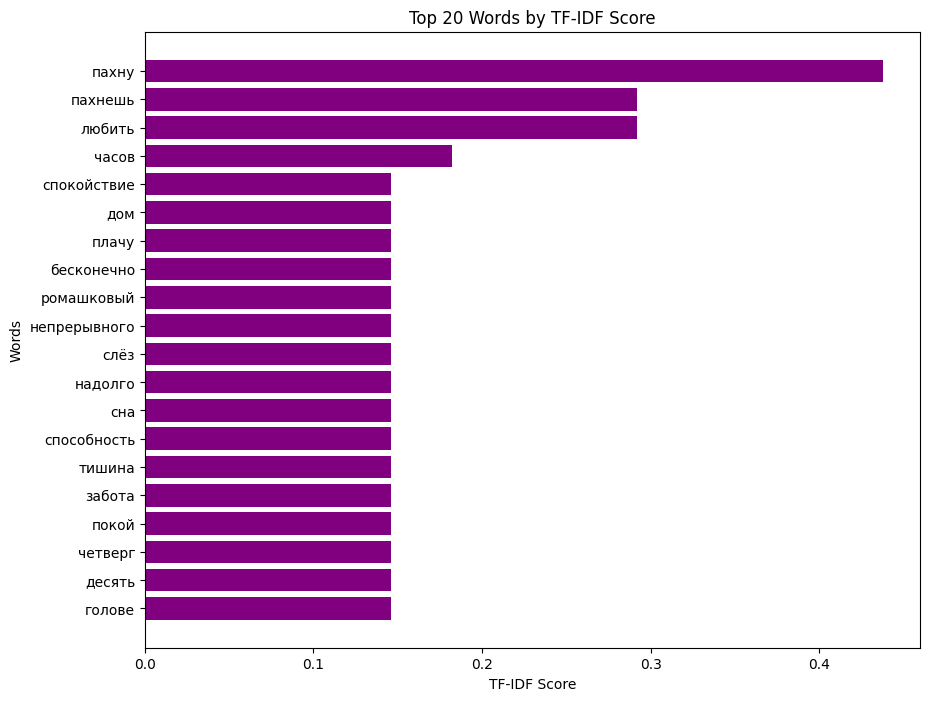

In [87]:
df_sorted = df.sort_values(by='tfidf', ascending=False).head(20)  # Отобразим топ 20 слов

plt.figure(figsize=(10, 8))
plt.barh(df_sorted.index, df_sorted['tfidf'], color='purple')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.title('Top 20 Words by TF-IDF Score')
plt.gca().invert_yaxis()
plt.show()

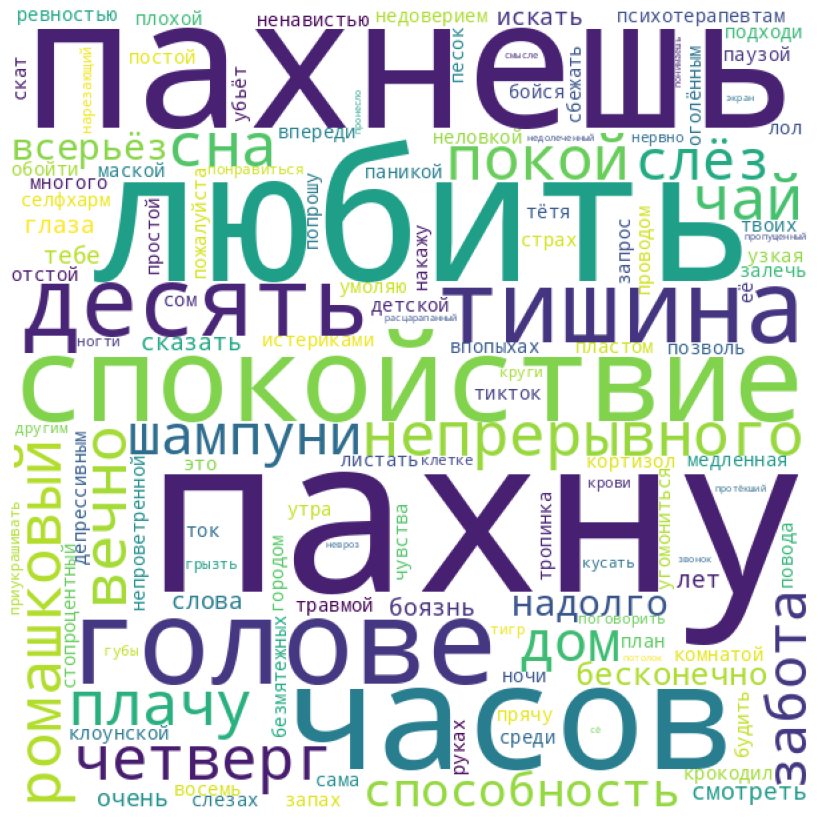

In [66]:
# Подсчет частоты слов
tokens = selfharm_preprocessed.split()

word_counts = Counter(tokens)

# Создание wordcloud
wordcloud = WordCloud(width=600, height=600, background_color='white', colormap='viridis',
                      random_state=42).generate_from_frequencies(word_counts)

# Визуализация
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#Ю-питер - "Девушка по городу"

In [88]:
u_piter = '''Девушка по городу шагает босиком
Девушке дорогу уступает светофор
Сверху улыбается воздушный постовой
Девушка в ответ ему кивает головой
А где-нибудь за городом идет весенний лед
Девушке навстречу расступается народ
Девушка по Пушкинской на Лиговский в обход
Следом по каналу проплывает пароход
А за окном мелькают дни
Они как взлетные огни
Одни заметны с высоты
Другие вовсе не видны
А на дворе цветет весна
Она в кого-то влюблена
А этот кто-то за окном
Сидит и видит день за днем
Как девушка по городу шагает босиком
По скверам и по улицам порхает мотыльком
Девушка ныряет через арку напролёт
Солнце пригревает, сердце девушки поёт
Как за окном мелькают дни
Они как птицы далеки
Одни витают в облаках
Другие вовсе не видны
А на дворе цветет весна
Она в кого-то влюблена
А этот кто-то за окном
Сидит и видит день за днем
Как за окном мелькают дни
Они как птицы далеки
Одни витают в облаках
Другие вовсе не видны
А на дворе цветет весна
Она в кого-то влюблена
А этот кто-то за окном
Сидит и видит день за днем
Как за окном мелькают дни
Они как птицы далеки
Одни витают в облаках
Другие вовсе не видны
А на дворе цветет весна
Она в кого-то влюблена
А этот кто-то за окном
Сидит и видит день за днем'''

In [89]:
u_piter_preprocessed = preprocess_text(u_piter)

In [90]:
u_piter_preprocessed

'девушка городу шагает босиком девушке дорогу уступает светофор сверху улыбается воздушный постовой девушка ответ кивает головой городом идет весенний лед девушке навстречу расступается народ девушка пушкинской лиговский обход следом каналу проплывает пароход окном мелькают дни взлетные огни одни заметны высоты другие вовсе видны дворе цветет весна кого влюблена окном сидит видит день днем девушка городу шагает босиком скверам улицам порхает мотыльком девушка ныряет арку напролёт солнце пригревает сердце девушки поёт окном мелькают дни птицы далеки одни витают облаках другие вовсе видны дворе цветет весна кого влюблена окном сидит видит день днем окном мелькают дни птицы далеки одни витают облаках другие вовсе видны дворе цветет весна кого влюблена окном сидит видит день днем окном мелькают дни птицы далеки одни витают облаках другие вовсе видны дворе цветет весна кого влюблена окном сидит видит день днем'

In [94]:
# Зафиттим наши данные в TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit([u_piter_preprocessed])

# Векторизуем через tf-idf
tfidf_matrix = tfidf.transform([u_piter_preprocessed])
tfidf_matrix_dense = tfidf_matrix.todense()

# Получение названий признаков (слов)
feature_names = tfidf.get_feature_names_out()

u_piter_df = pd.DataFrame(tfidf_matrix_dense.T, index=feature_names, columns=['tfidf'])

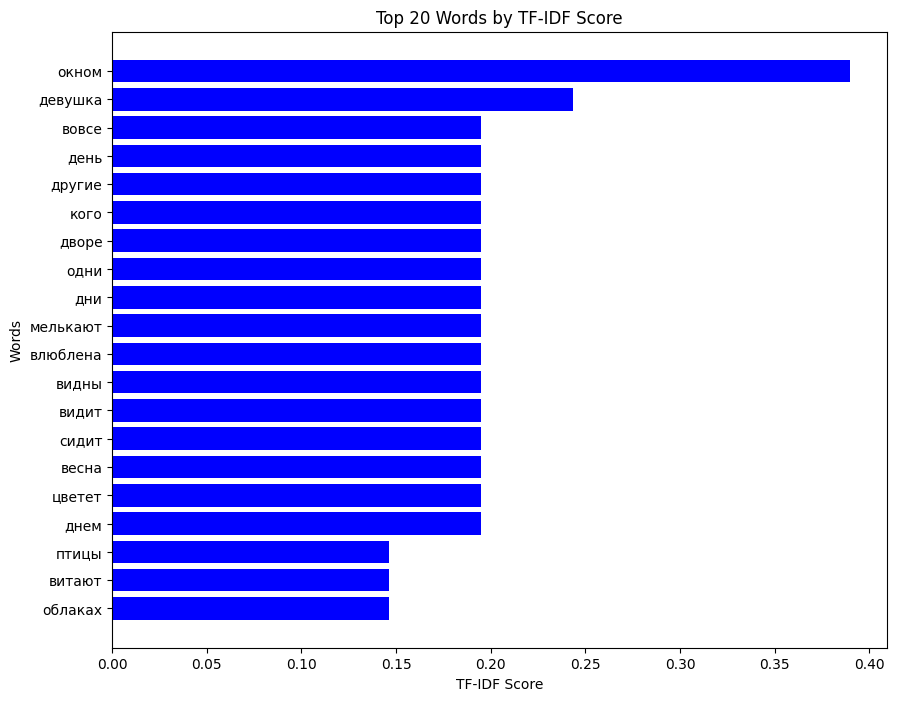

In [105]:
df_sorted = u_piter_df.sort_values(by='tfidf', ascending=False).head(20)  # Отобразим топ 20 слов

plt.figure(figsize=(10, 8))
plt.barh(df_sorted.index, df_sorted['tfidf'], color='blue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.title('Top 20 Words by TF-IDF Score')
plt.gca().invert_yaxis()
plt.show()

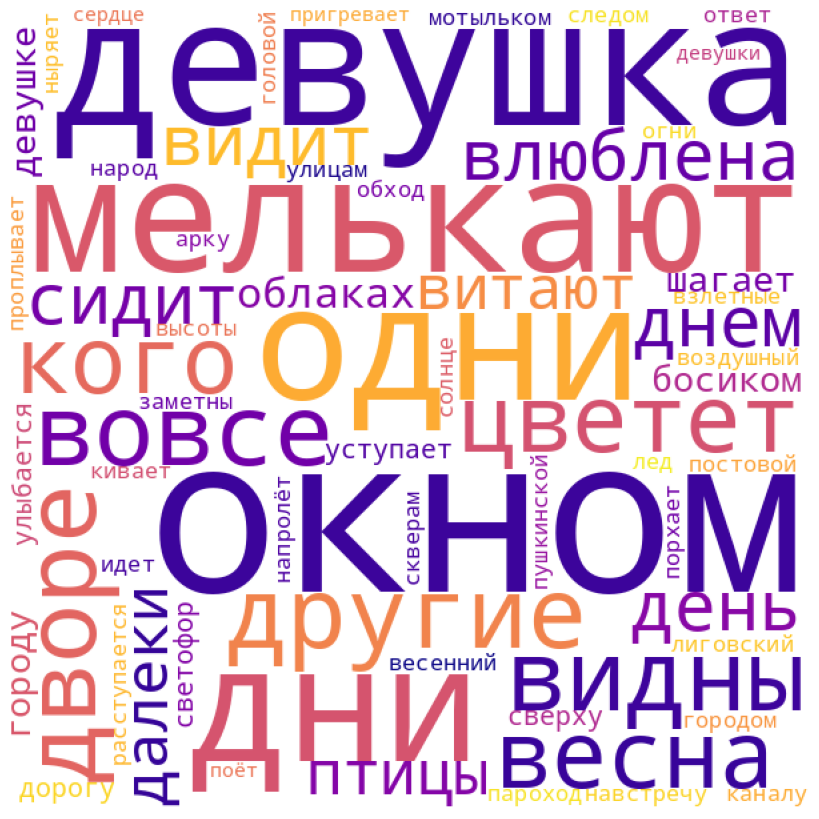

In [97]:
# Подсчет частоты слов
tokens = u_piter_preprocessed.split()

word_counts = Counter(tokens)

# Создание wordcloud
wordcloud = WordCloud(width=600, height=600, background_color='white', colormap='plasma',
                      random_state=42).generate_from_frequencies(word_counts)

# Визуализация
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#Сплин - "Выхода нет"

In [98]:
splin = '''Сколько лет прошло, всё о том же гудят провода
Всё того же ждут самолёты
Девочка с глазами из самого синего льда
Тает под огнём пулемёта
Должен же растаять хоть кто-то

Скоро рассвет, выхода нет
Ключ поверни и полетели
Нужно писать в чью-то тетрадь
Кровью, как в метрополитене
Выхода нет
Выхода нет

Где-то мы расстались, не помню в каких городах
Словно это было в похмелье
Через мои песни идут и идут поезда
Исчезая в тёмном тоннеле
Лишь бы мы проснулись в одной постели

Скоро рассвет, выхода нет
Ключ поверни и полетели
Нужно писать в чью-то тетрадь
Кровью, как в метрополитене
Выхода нет
Выхода нет

Сколько лет пройдёт, всё о том же гудеть проводам
Всё того же ждать самолётам
Девочка с глазами из самого синего льда
Тает под огнём пулемёта
Лишь бы мы проснулись с тобой в одной постели

Скоро рассвет, выхода нет
Ключ поверни и полетели
Нужно писать в чью-то тетрадь
Кровью, как в метрополитене
Выхода нет
Выхода нет

Выхода нет
Выхода нет'''

In [99]:
splin_preprocessed = preprocess_text(splin)

In [100]:
splin_preprocessed

'сколько лет прошло всё гудят провода всё ждут самолёты девочка глазами самого синего льда тает огнём пулемёта должен растаять скоро рассвет выхода ключ поверни полетели нужно писать чью тетрадь кровью метрополитене выхода выхода расстались помню каких городах словно это похмелье мои песни идут идут поезда исчезая тёмном тоннеле лишь проснулись одной постели скоро рассвет выхода ключ поверни полетели нужно писать чью тетрадь кровью метрополитене выхода выхода сколько лет пройдёт всё гудеть проводам всё ждать самолётам девочка глазами самого синего льда тает огнём пулемёта лишь проснулись тобой одной постели скоро рассвет выхода ключ поверни полетели нужно писать чью тетрадь кровью метрополитене выхода выхода выхода выхода'

In [101]:
# Зафиттим наши данные в TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit([splin_preprocessed])

# Векторизуем через tf-idf
tfidf_matrix = tfidf.transform([splin_preprocessed])
tfidf_matrix_dense = tfidf_matrix.todense()

# Получение названий признаков (слов)
feature_names = tfidf.get_feature_names_out()

splin_df = pd.DataFrame(tfidf_matrix_dense.T, index=feature_names, columns=['tfidf'])

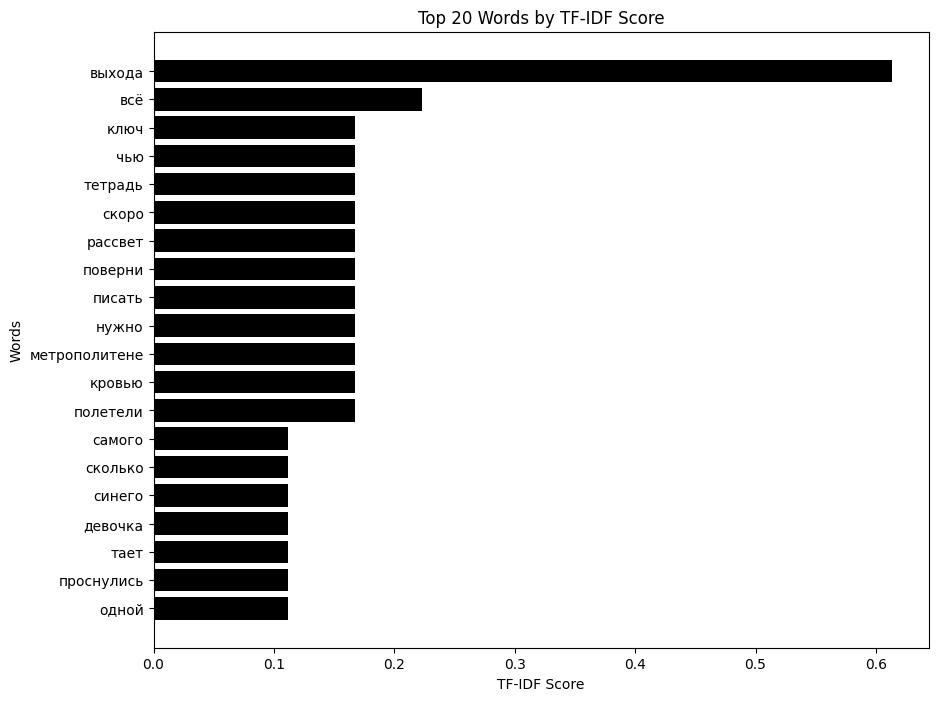

In [108]:
df_sorted = splin_df.sort_values(by='tfidf', ascending=False).head(20)  # Отобразим топ 20 слов

plt.figure(figsize=(10, 8))
plt.barh(df_sorted.index, df_sorted['tfidf'], color='black')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.title('Top 20 Words by TF-IDF Score')
plt.gca().invert_yaxis()
plt.show()

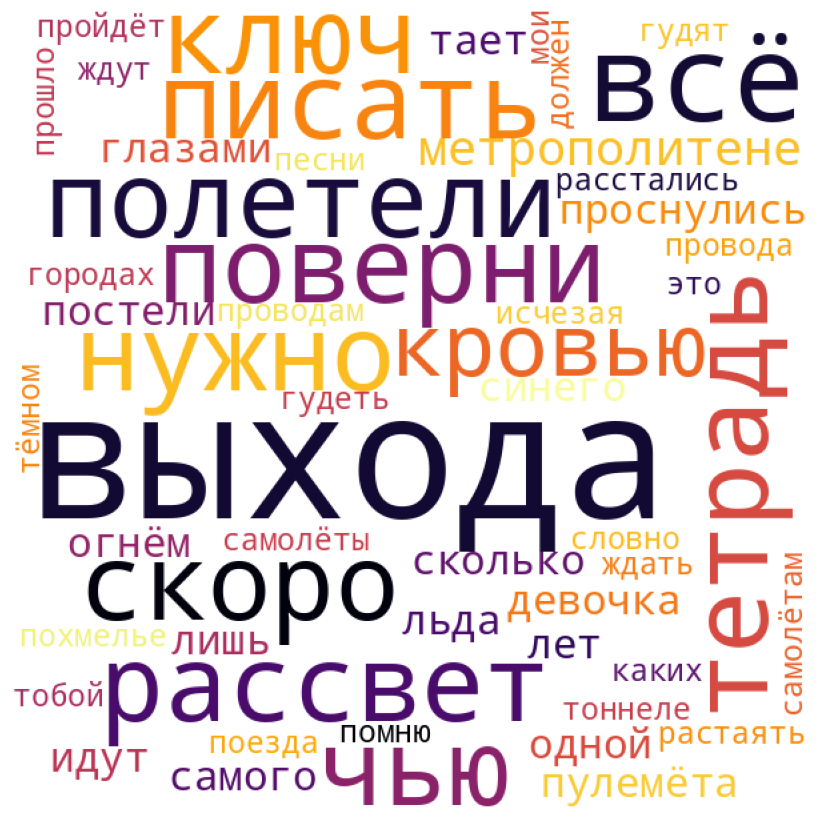

In [107]:
# Подсчет частоты слов
tokens = splin_preprocessed.split()

word_counts = Counter(tokens)

# Создание wordcloud
wordcloud = WordCloud(width=600, height=600, background_color='white', colormap='inferno',
                      random_state=42).generate_from_frequencies(word_counts)

# Визуализация
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()